## Looking at various Global Warming data APIs

In [ ]:
import requests
import os
from dotenv import load_dotenv, find_dotenv
from ast import literal_eval
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
if "jms_style_sheet" in plt.style.available:
    plt.style.use("jms_style_sheet")

In [67]:
url = "https://melted-polar-ice-cap.p.rapidapi.com/api/arctic-api"

headers = {
    'x-rapidapi-host': "melted-polar-ice-cap.p.rapidapi.com",
    'x-rapidapi-key': os.getenv("RAPID_API_KEY")
    }

response = requests.request("GET", url, headers=headers)

In [68]:
df = pd.DataFrame(literal_eval(response.text[24:-2]))

In [69]:
df.head(3)

,year,extent,area
0,1979,7.05,4.58
1,1980,7.67,4.87
2,1981,7.14,4.44


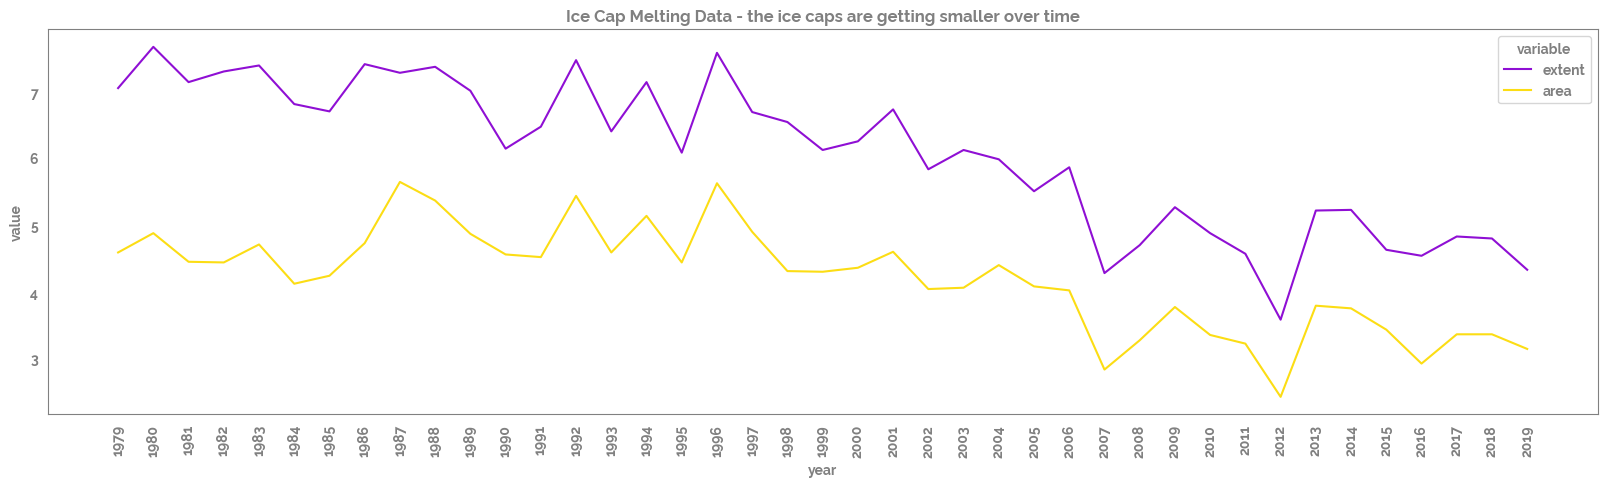

In [70]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df.melt(id_vars="year"),
                 x="year",
                 y="value",
                 hue="variable")
_ = plt.xticks(rotation=90)
_ = plt.title("Ice Cap Melting Data - the ice caps are getting smaller over time")

In [49]:
url = "https://global-warming.org/api/temperature-api"
# pd.read_json()
response = requests.request("GET", url, headers=None)

In [56]:
df=pd.DataFrame(literal_eval(response.text[24:-2])).astype(float)
df.head()

,time,station,land
0,1880.04,-0.22,-0.17
1,1880.13,-0.40,-0.22
2,1880.21,-0.28,-0.08
3,1880.29,-0.48,-0.15
4,1880.38,-0.19,-0.08


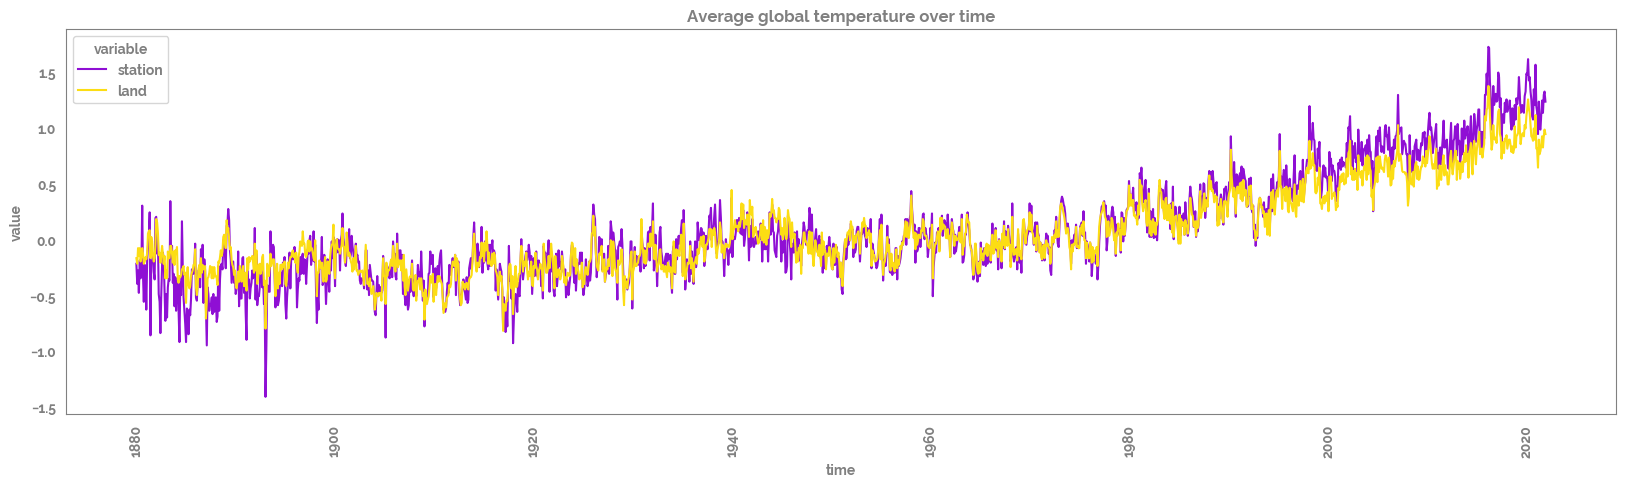

In [58]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df.melt(id_vars="time"),
                 x="time",
                 y="value",
                 hue="variable")
_ = plt.xticks(rotation=90)
_ = plt.title("Average global temperature over time")

In [74]:
url="https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
df=pd.read_csv(url, header=1).drop(['J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'], axis=1).replace("***", np.nan).astype(float)

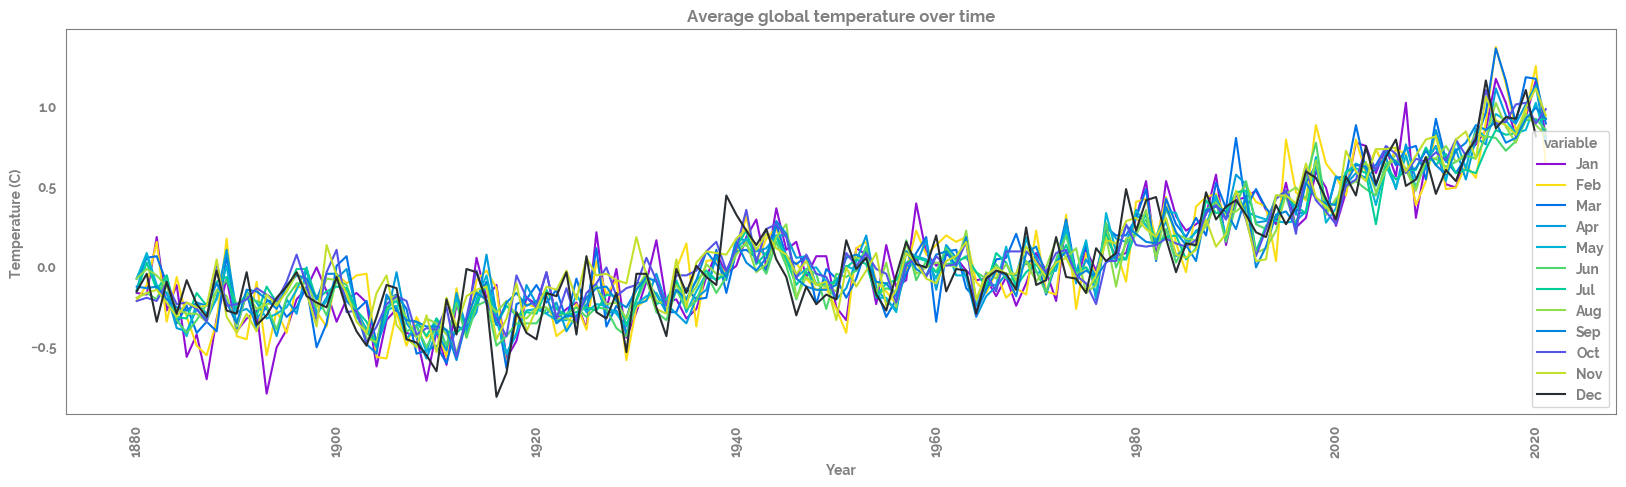

In [89]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df.melt("Year"),
                 x="Year",
                 y="value",
                 hue="variable")
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Year")
_ = plt.ylabel("Temperature (C)")
_ = plt.title("Average global temperature over time")

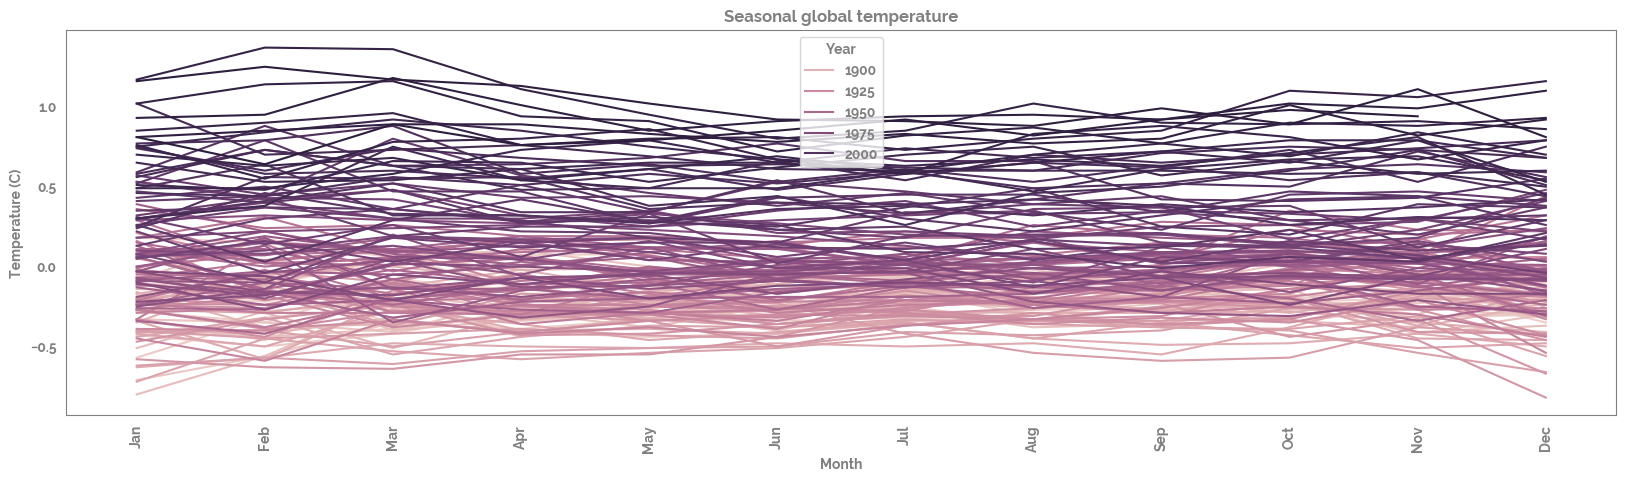

In [87]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df.melt("Year"),
                 x="variable",
                 y="value",
                 hue="Year"
                 )
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Month")
_ = plt.ylabel("Temperature (C)")
_ = plt.title("Seasonal global temperature")